# EDA with Quandl Futures Data

###  1. Importing Quandl Futures Data and Visualising Market Structure

In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
quandl.ApiConfig.api_key = "rn2xyN_hG9XfxN_9ibFJ"

In [3]:
brent_datasets = {}

# Query prices for continuous Brent Crude Oil contracts from M to M+24
for depth in range(1, 26):
    brent_datasets[f"brent_{depth}"] = quandl.get(f'CHRIS/ICE_B{depth}')['Settle']

In [4]:
todays_contract_prices = []

# Return the latest prices for each Brent contract from M to M+24
for depth in range(1, 26):
    contract_last_px = brent_datasets[f'brent_{depth}'][-1]
    todays_contract_prices.append(contract_last_px)
    
todays_contract_prices

[70.75,
 70.02,
 69.43,
 68.91,
 68.48,
 68.07,
 67.7,
 67.36,
 67.06,
 66.77,
 66.47,
 66.16,
 65.87,
 65.58,
 65.28,
 64.98,
 64.65,
 64.35,
 64.12,
 63.89,
 63.67,
 63.45,
 63.23,
 63.02,
 62.8]

In [5]:
# Store the prices in a pandas DataFrame object
mkt_structure = pd.DataFrame()
mkt_structure['Brent Futures Price'] = pd.Series(todays_contract_prices)
mkt_structure

,Brent Futures Price
0,70.75
1,70.02
2,69.43
3,68.91
4,68.48
5,68.07
6,67.70
7,67.36
8,67.06
9,66.77


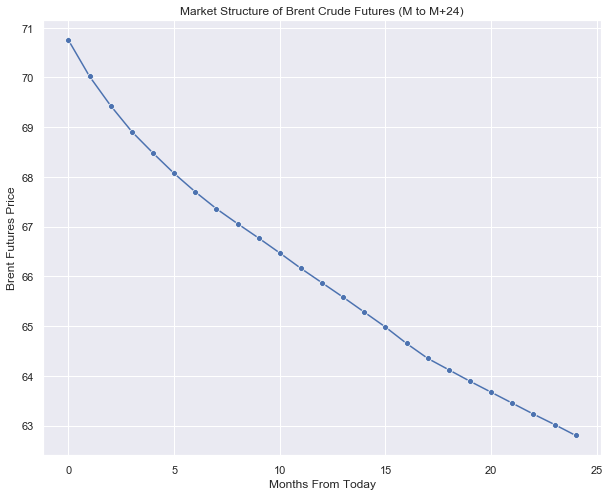

In [6]:
# Plot each Contract Price with seaborn to visualise the market structure for Brent Crude Oil
sns.set()
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10, 8))
ax = sns.lineplot(x=mkt_structure.index, y="Brent Futures Price", marker='o', data=mkt_structure)
plt.title('Market Structure of Brent Crude Futures (M to M+24)')
plt.xlabel('Months From Today');

### Analysis

The Brent Crude Market as of 4 May 2019 appears to be in [backwardation](https://www.investopedia.com/terms/b/backwardation.asp). This is highlighted by the visualised fact of spot prices (roughly $\$ $71) being sharper than Brent for delivery in M months time (E.g. $66.47 in 10 months time).

The backwardated market is potentially motivated by a shortage of crude in the immediate months (hence the premium for Brent today versus Brent tomorrow). This hypothesis is backed by recent news of the [US ending waivers for sanctions on Iranian Oil](https://www.ft.com/content/52f6df92-6571-11e9-9adc-98bf1d35a056). Seasonally, we also anticipate higher oil prices in the short-term owing to higher gasoline (and hence higher crude) demand in the summer months.

One potential way to play this market would be to enter into a long futures position in a contract with a later date for delivery (E.g. M+12), with the expectation of [futures prices eventually converging to spot prices](https://www.investopedia.com/ask/answers/081414/what-best-way-play-backwardation-futures-market.asp).

### 2. Time Spreads

In [7]:
brent_12_months = pd.DataFrame()

# Append the time series of Brent contracts from M to M+12 to a pandas DataFrame
for depth in range(1, 14):
    contract_data = brent_datasets[f'brent_{depth}'].copy()
    contract_data.rename(columns={'Settle': f'M+{depth-1}'}, inplace=True)
    brent_12_months[f'M+{depth-1}'] = contract_data

In [8]:
brent_12_months.tail()

,M+0,M+1,M+2,M+3,M+4,M+5,M+6,M+7,M+8,M+9,M+10,M+11,M+12
Date,,,,,,,,,,,,,
2019-04-26,72.15,71.63,71.00,70.45,69.95,69.56,69.16,68.80,68.45,68.13,67.81,67.49,67.17
2019-04-29,72.04,71.54,70.92,70.39,69.91,69.54,69.17,68.81,68.47,68.15,67.84,67.53,67.21
2019-04-30,72.06,71.45,70.91,70.42,70.03,69.64,69.27,68.92,68.60,68.28,67.95,67.61,67.30
2019-05-01,72.18,71.50,70.95,70.44,70.03,69.62,69.25,68.91,68.59,68.28,67.96,67.63,67.33
2019-05-02,70.75,70.02,69.43,68.91,68.48,68.07,67.70,67.36,67.06,66.77,66.47,66.16,65.87


In [9]:
brent_12_months.dropna(inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


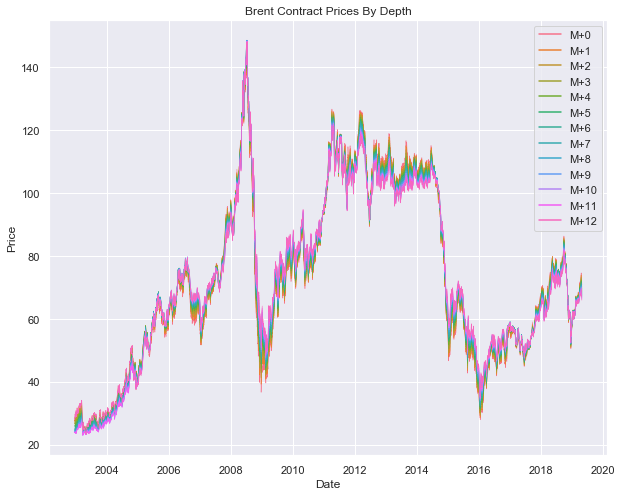

In [10]:
fig = plt.figure(figsize=(10, 8))

ax = sns.lineplot(data=brent_12_months, dashes=False, lw=0.5)
plt.title('Brent Contract Prices By Depth')
plt.ylabel('Price');

In [11]:
# Create Price Spreads across time for 3M, 6M, 9M and 12M
brent_12_months['3M Spread'] = brent_12_months['M+3'] - brent_12_months['M+0']
brent_12_months['6M Spread'] = brent_12_months['M+6'] - brent_12_months['M+0']
brent_12_months['9M Spread'] = brent_12_months['M+9'] - brent_12_months['M+0']
brent_12_months['12M Spread'] = brent_12_months['M+12'] - brent_12_months['M+0']
brent_12_months.dropna(inplace=True)

In [12]:
brent_12_months[['3M Spread', '6M Spread', '9M Spread', '12M Spread']].tail()

,3M Spread,6M Spread,9M Spread,12M Spread
Date,,,,
2019-04-26,-1.70,-2.99,-4.02,-4.98
2019-04-29,-1.65,-2.87,-3.89,-4.83
2019-04-30,-1.64,-2.79,-3.78,-4.76
2019-05-01,-1.74,-2.93,-3.90,-4.85
2019-05-02,-1.84,-3.05,-3.98,-4.88


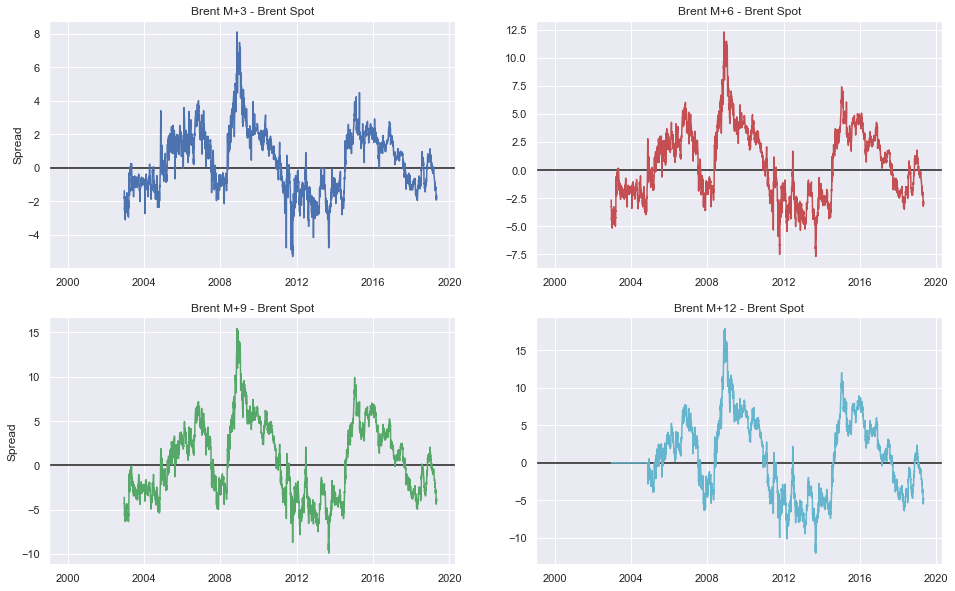

In [13]:
# Visualise each Time-Based Price Spread

fig = plt.figure(figsize=(16, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plt.axhline(y=0, color='k')
plt.title('Brent M+3 - Brent Spot')
plt.ylabel('Spread')
ax1.plot(brent_12_months['3M Spread'], color='b')

ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
plt.axhline(y=0, color='k')
plt.title('Brent M+6 - Brent Spot')
ax2.plot(brent_12_months['6M Spread'], color='r')

ax3 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plt.axhline(y=0, color='k')
plt.title('Brent M+9 - Brent Spot')
plt.ylabel('Spread')
ax3.plot(brent_12_months['9M Spread'], color='g')

ax4 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)
plt.axhline(y=0, color='k')
plt.title('Brent M+12 - Brent Spot')
ax4.plot(brent_12_months['12M Spread'], color='c');

### Analysis

The multi-plot analysis of price spreads across time mostly reflects the same salient facts about the Brent Market (i.e. prices for Brent in the deferred months are lower than current spot prices).

Given the steep backwardation observed in the initial market structure, price spreads between the [Front Month Contract](https://www.investopedia.com/terms/f/front-month-contract.asp) and the [Back Month Contracts](https://www.investopedia.com/terms/b/backmonths.asp) decrease as we go further out in time. (Note that the 12-month time spread is at -$\$$4.88 but the 3-month time spread is at -$1.84)

Historically, we can see that in periods of steep [contango](https://www.investopedia.com/terms/c/contango.asp) (e.g. 2016), the calendar spread can be as high as $\$$10 per barrel. Periods such as these present arbitrage opportunities when traders buy the commodity at spot prices, stockpile them at a [storage facility](https://www.vopak.com/tank-terminals), and sell the barrels when prices recover.

The identification of such arbitrage opportunities may cause them to diminish as more traders buy up the available barrels of oil. Doing so elevates current spot prices and causes the calendar spread (i.e. the difference between spot prices and deferred prices) to shrink in time.

### 3. Geographical Spreads

In [14]:
# Query prices for Dubai Crude futures traded on the Chicago Mercantile Exchange
dubai_crude = quandl.get(f'CHRIS/CME_DC1')['Settle']

In [15]:
dubai_crude.tail()

Date
2019-04-26    70.958
2019-04-29    70.930
2019-04-30    70.950
2019-05-01    70.950
2019-05-02    70.950
Name: Settle, dtype: float64

In [16]:
# Combine Brent and Dubai Futures Time Series into a single pandas DataFrame object
brent_dubai = pd.DataFrame()
brent_dubai['Brent'] = brent_datasets['brent_1']
brent_dubai['Dubai'] = dubai_crude

In [17]:
brent_dubai.dropna(inplace=True)
brent_dubai.tail()

,Brent,Dubai
Date,,
2019-04-26,72.15,70.958
2019-04-29,72.04,70.930
2019-04-30,72.06,70.950
2019-05-01,72.18,70.950
2019-05-02,70.75,70.950


In [18]:
brent_dubai['Spread'] = brent_dubai['Brent']- brent_dubai['Dubai']

In [19]:
brent_dubai['Spread'].tail()

Date
2019-04-26    1.192
2019-04-29    1.110
2019-04-30    1.110
2019-05-01    1.230
2019-05-02   -0.200
Name: Spread, dtype: float64

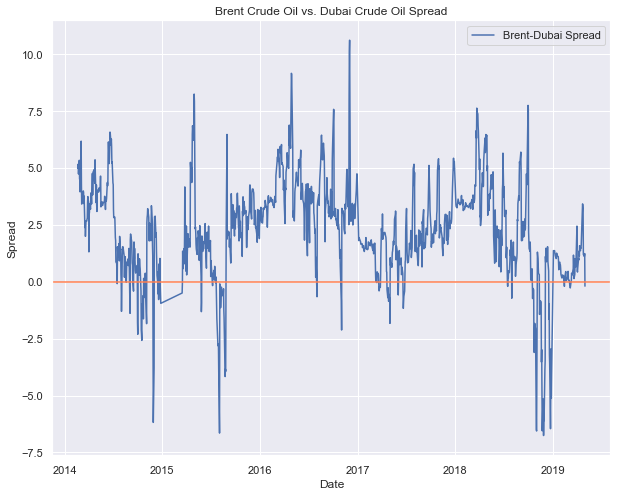

In [20]:
# Visualise the Brent-Dubai Spread
fig = plt.figure(figsize=(10, 8))
ax = sns.lineplot(x=brent_dubai.index, y="Spread", data=brent_dubai, label='Brent-Dubai Spread')
plt.title('Brent Crude Oil vs. Dubai Crude Oil Spread')
plt.axhline(y=0, color='coral');

### Analysis

Beyond calendar spreads, another set of opportunities in physical commodity trading are geographical spreads (i.e. buying commodities in one location and selling them at another, net of transportation costs). In this space, a benchmark spread is the [Brent-Dubai Spread](https://www.investopedia.com/articles/investing/102314/understanding-benchmark-oils-brent-blend-wti-and-dubai.asp), the difference in price between the front-month ICE Brent Futures Contract and the CME Dubai Swap.

Depending on the size of the spread, one possibly viable strategy would be to [source crude cargoes from Europe and West Africa (i.e. the Brent basket) and sell them into traditional demand centres in Asia (i.e. the Dubai basket)](https://www.hellenicshippingnews.com/analysis-key-brent-dubai-spread-sees-instability-amid-volatile-crude-prices/). As we can see from the chart above, the current spread is trading at close to $\$$0 which presents little arbitrage opportunities from a geographical perspective.

Tracking the Brent-Dubai Spread, however, may lead to the identification of future opportunities where the arbitrage becomes viable. Should the spread cross $\$$3, for instance, Middle Eastern crude barrels may seem expensive relative to European/West African Crude and traders can buy Brent Cargoes, ship them East of Suez, and sell them to Asian customers at a positive P&L.

### 4. Technical Spreads

In [21]:
# Query prices for continuous Singaporee 
singapore_180 = quandl.get(f'CHRIS/CME_UA1')['Settle']
singapore_380 = quandl.get(f'CHRIS/CME_SE1')['Settle']

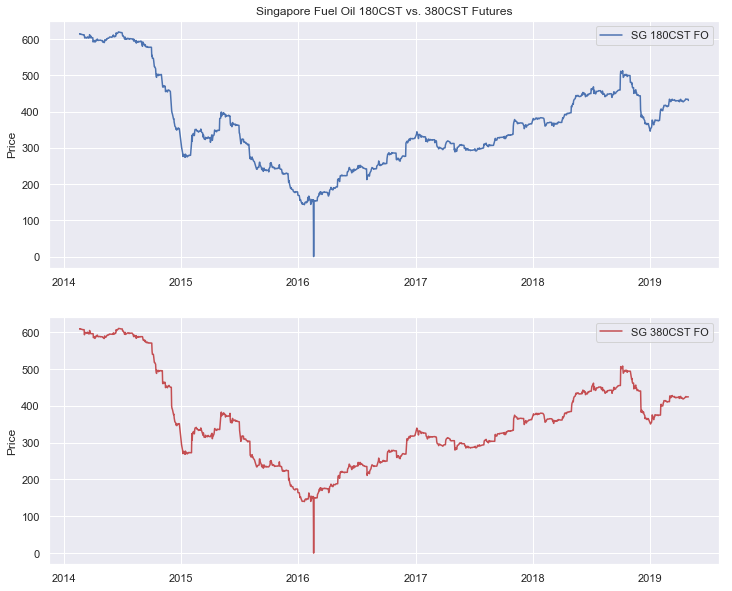

In [22]:
# Visualise both Fuel Oil price time series
singapore_180.dropna(inplace=True)
singapore_380.dropna(inplace=True)

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)
plt.title('Singapore Fuel Oil 180CST vs. 380CST Futures')
plt.ylabel('Price')
ax2 = plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)
plt.ylabel('Price')

ax1.plot(singapore_180, label='SG 180CST FO')
ax2.plot(singapore_380, label='SG 380CST FO', color='r')

ax1.legend()
ax2.legend();

In [23]:
# Store the Spread Data in a pandas DataFrame
fuel_oil_spread = pd.DataFrame()
singapore_180.rename(columns={'Settle': '180CST'}, inplace=True)
singapore_380.rename(columns={'Settle': '380CST'}, inplace=True)

fuel_oil_spread['180CST'] = singapore_180
fuel_oil_spread['380CST'] = singapore_380
fuel_oil_spread['Spread'] = fuel_oil_spread['180CST'] - fuel_oil_spread['380CST']

In [24]:
fuel_oil_spread['Spread'].tail()

Date
2019-04-26    9.726
2019-04-29    9.796
2019-04-30    9.846
2019-05-01    9.846
2019-05-02    6.436
Name: Spread, dtype: float64

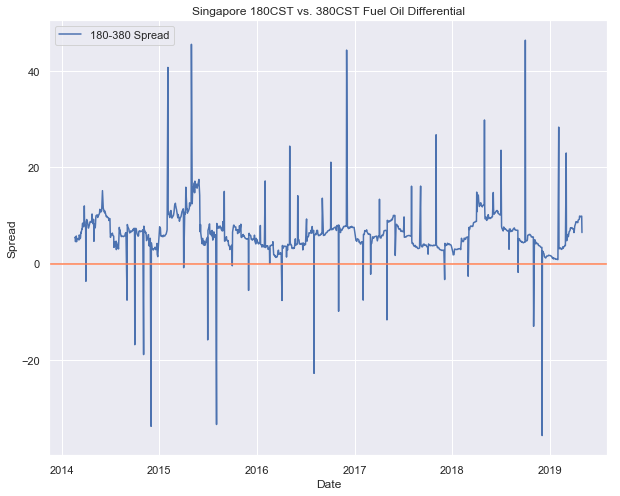

In [25]:
# Visualise the Singapore 180CST-380CST Fuel Oil Visco Spread
fig = plt.figure(figsize=(10, 8))
ax = sns.lineplot(x=fuel_oil_spread.index, y="Spread", data=fuel_oil_spread, label='180-380 Spread')
plt.title('Singapore 180CST vs. 380CST Fuel Oil Differential')
plt.axhline(y=0, color='coral');

### Analysis

A final form of physical arbitrage consists of blending and '[technical arbitrages](https://www.trafigura.com/how-physical-arbitrage-works/)'. Such strategies leverage on the fact that different markets have varying grades and specifications for commodities (such as the ethanol content of gasoline).

For such strategies, one useful spread to track is the Fuel Oil Visco Spread (short for 'Viscosity', a chemical parameter measured in centistokes, hence 'CST'). The chart above suggests that Singapore 180CST Fuel Oil trades at a premium to Singapore 380CST Fuel Oil, with this premium increasing in time for the year 2019.

Extremely high visco spreads generally suggest that higher-grade Fuel Oil cargoes are in greater demand to lower-grade ones. Such instances may arise in response to, for instance, [a shortage of cutter stock](https://www.hellenicshippingnews.com/asia-fuel-oil-cash-premiums-visco-spreads-jump-on-tight-cutter-supplies/) which is needed to blend 380CST Fuel Oil into bunker fuel for ships.